In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np 
import pandas as pd 
import io 
import requests
import datetime as dt


Viết Phương trình

In [2]:
def ConvertAirFrom_PPM_To_mgDivm3(x):
    return x*(0.0409)*44
def ConvertAirFrom_mgDivm3_To_UmolDivm3(x):
    return x*(1000/44)
def ConvertAirFrom_UmolDivm3_To_mgDivm3(x):
    return x/(1000/44)
def ConvertAirFrom_mgDivm3_To_UmolDivmol(x):
    return x/((0.0409)*44)


In [3]:
def dx(cap_CO2_Air,cap_CO2_Top,MC_BlowAir,MC_ExtAir,MC_PadAir,MC_AirCan,MC_AirTop,MC_AirOut,MC_TopOut):
    global CO2_Air
    MC_BlowAir=def_MC_BlowAir(Eta_HeatCO2,U_Blow,P_Blow,A_Flr)
    print("MC_BlowAir=",MC_BlowAir)
    print()

    MC_ExtAir=def_MC_ExtAir(U_ExtCO2,Phi_ExtCO2,A_Flr)
    print("MC_ExtAir=",MC_ExtAir)
    print()

    MC_PadAir=def_MC_PadAir(U_Pad,Phi_Pad,A_Flr,CO2_Out,CO2_Air)
    print("MC_PadAir=",MC_PadAir)
    print()

    f_ThScr=def_f_ThScr(U_ThScr,K_ThScr,Delta_T_AirTop,g,RO_Mean,Delta_RO)
    print("f_ThScr=",f_ThScr)
    MC_AirTop=def_MC_AirTop(f_ThScr,CO2_Air,CO2_Top)
    print("MC_AirTop=",MC_AirTop)
    print()

    ff_VentSide=def_f_VentRoofSide(C_d,A_Flr,U_Roof,0,U_Side,A_Side,g,h_SideRoof,Delta_T_AirOut,T_mean,C_w,v_Wind) # A_Roof=0
    print("ff_VentSide=",ff_VentSide)
    Eta_InsScr=def_Eta_InsScr(Zeta_InsScr)
    print("Eta_InscScr=",Eta_InsScr)
    f_leakage=def_f_leakage(v_Wind,C_leakage)
    print("f_leakage=",f_leakage)
    f_VentRoofSide=def_f_VentRoofSide(C_d,A_Flr,U_Roof,A_Roof,U_Side,A_Side,g,h_SideRoof,Delta_T_AirOut,T_mean,C_w,v_Wind)
    print("f_VentRoofSide=",f_VentRoofSide)
    f_VentForced=def_f_VentForced(Eta_InsScr,U_VentForced,Phi_VentForced,A_Flr)
    print("f_VentForced=",f_VentForced)
    f_VentSide=def_f_VentSide(Eta_InsScr,ff_VentSide,f_leakage,U_ThScr,f_VentRoofSide,Eta_Side,Eta_SideThr)
    print("f_VentSide=",f_VentSide)
    MC_AirOut=def_MC_AirOut(f_VentSide,f_VentForced,CO2_Air,CO2_Out)
    print("MC_AirOut=",MC_AirOut)
    print()

    
    ff_VentRoof=def_ff_VentRoof(C_d,U_Roof,A_Roof,A_Flr,g,h_Roof,Delta_T_AirOut,T_mean,C_w,v_Wind)
    print("ff_VentRoof=",ff_VentRoof)
    f_VentRoof=def_f_VentRoof(Eta_InsScr,ff_VentRoof,f_leakage,U_ThScr,f_VentRoofSide,Eta_Roof,Eta_RoofThr) 
    print("f_VentRoof",f_VentRoof)
    # can be changed
    MC_TopOut=def_MC_TopOut(f_VentRoof,CO2_Top,CO2_Out)
    print("MC_TopOut",MC_TopOut)
    print()
    h_C_Buf=def_h_C_Buf(C_Buf,C_Max_Buf)
    print("h_C_Buf",h_C_Buf)

    #Phần quang hợp
    #Đổi đơn vị của CO2
    CO2_Air=ConvertAirFrom_mgDivm3_To_UmolDivmol(float(CO2_Air))

    Gamma=def_Gamma(c_Gamma,T_Can)
    print("Gamma=",Gamma)
    CO2_Stom=def_CO2_Stom(Eta_CO2_Air_Stom,CO2_Air)
    print("CO2_Stom=",CO2_Stom)
    J_Max_Can=def_J_Max_Can(LAI,J_Max_Leaf)
    print("J_Max_Can=",J_Max_Can)
    J_POT=def_J_POT(J_Max_Can,E_j,T_Can,T_25,R,S,H)
    print("J_POT=",J_POT)
    J=def_J(J_POT,anpha,PAR_Can,Theta)
    print("J=",J)
    P=def_P(J,CO2_Stom,Gamma)
    print("P=",P)
    R_HOHAP=0.01*P
    MC_AirCan=def_MC_AirCan(M_CH2O,h_C_Buf,P,R_HOHAP)
    print("MC_AirCan=",MC_AirCan)

    #đổi lại đơn vị cho CO2_Air
    CO2_Air=ConvertAirFrom_PPM_To_mgDivm3(float(CO2_Air))

    dx1=(MC_BlowAir+MC_ExtAir+MC_PadAir-MC_AirCan-MC_AirTop-MC_AirOut)/cap_CO2_Air
    dx2=(MC_AirTop-MC_TopOut)/cap_CO2_Top
    print()
    return [dx1,dx2]

In [4]:
def def_MC_BlowAir(Eta_HeatCO2,U_Blow,P_Blow,A_Flr):
    return Eta_HeatCO2*U_Blow*P_Blow/A_Flr

def def_MC_ExtAir(U_ExtCO2,Phi_ExtCO2,A_Flr):
    return U_ExtCO2*Phi_ExtCO2/A_Flr

def def_MC_PadAir(U_Pad,Phi_Pad,A_Flr,CO2_Out,CO2_Air):
    return U_Pad*Phi_Pad*(CO2_Out-CO2_Air)/A_Flr

def def_f_ThScr(U_ThScr,K_ThScr,Delta_T_AirTop,g,RO_Mean,Delta_RO):
    return U_ThScr*K_ThScr*((Delta_T_AirTop)**(2/3))+(1-U_ThScr)*(((g*(1-U_ThScr)/(2*RO_Mean))*Delta_RO)**(1/2))

def def_MC_AirTop(f_ThScr,CO2_Air,CO2_Top):
    return f_ThScr*(CO2_Air-CO2_Top)

def def_f_VentRoofSide(C_d,A_Flr,U_Roof,A_Roof,U_Side,A_Side,g,h_SideRoof,Delta_T_AirOut,T_mean,C_w,v_Wind):
    component1=C_d/A_Flr
    component2=((U_Roof**2)*(U_Side**2)*(A_Roof**2)*(A_Side**2))/((U_Roof**2)*(A_Roof**2)+(U_Side**2)*(A_Side**2))
    component3=(2*g*h_SideRoof*Delta_T_AirOut)/T_mean
    component4=(((U_Roof*A_Roof+U_Side*A_Side)/2)**2)*C_w*(v_Wind**2)
    return component1*((component2*component3+component4)**(1/2))

def def_Eta_InsScr(Zeta_InsScr):
    return Zeta_InsScr*(2-Zeta_InsScr)

def def_f_leakage(v_Wind,C_leakage):
    if (v_Wind<0.25):
        return 0.25*C_leakage
    else:
        return v_Wind*C_leakage

def def_f_VentForced(Eta_InsScr,U_VentForced,Phi_VentForced,A_Flr):
    return Eta_InsScr*U_VentForced*Phi_VentForced/A_Flr

def def_f_VentSide(Eta_InsScr,ff_VentSide,f_leakage,U_ThScr,f_VentRoofSide,Eta_Side,Eta_SideThr):
    if (Eta_Side>=Eta_SideThr):
        return Eta_InsScr*ff_VentSide+0.5*f_leakage
    else:
        return Eta_InsScr*(U_ThScr*ff_VentSide+(1-U_ThScr)*f_VentRoofSide*Eta_Side)+0.5*f_leakage

def def_MC_AirOut(f_VentSide,f_VentForced,CO2_Air,CO2_Out):
    return (f_VentSide+f_VentForced)*(CO2_Air-CO2_Out)

def def_ff_VentRoof(C_d,U_Roof,A_Roof,A_Flr,g,h_Roof,Delta_T_AirOut,T_mean,C_w,v_Wind):
    component1=C_d*U_Roof*A_Roof/(2*A_Flr)
    component2=(g*h_Roof*Delta_T_AirOut/(2*T_mean))+C_w*(v_Wind**2)
    return component1*(component2**(1/2))

def def_f_VentRoof(Eta_InsScr,ff_VentRoof,f_leakage,U_ThScr,f_VentRoofSide,Eta_Roof,Eta_RoofThr):
    if (Eta_Roof>=Eta_RoofThr):
        return Eta_InsScr*ff_VentRoof+0.5*f_leakage
    else:
        return Eta_InsScr*(U_ThScr*ff_VentRoof+(1-U_ThScr)*f_VentRoofSide*Eta_Roof)+0.5*f_leakage

def def_MC_TopOut(f_VentRoof,CO2_Top,CO2_Out):
    return f_VentRoof*(CO2_Top-CO2_Out)

def def_h_C_Buf(C_Buf,C_Max_Buf):
    if (C_Buf>C_Max_Buf):
        return 0
    else:
        return 1

def def_MC_AirCan(M_CH2O,h_C_Buf,P,R_HOHAP):
    return M_CH2O*h_C_Buf*(P-R_HOHAP)



Quang Hợp

In [5]:
def def_P(J,CO2_Stom,Gamma):
    component1=J*(CO2_Stom-Gamma)
    component2=4*(CO2_Stom+2*Gamma)
    return component1/component2
def def_J(J_POT,anpha,PAR_Can,Theta):
    component1=J_POT+anpha*PAR_Can
    component2=4*Theta*J_POT*anpha*PAR_Can
    return (component1-((component1**2)-component2)**(1/2))/(2*Theta)
def def_J_POT(J_Max_Can,E_j,T_Can,T_25,R,S,H):
    component1=J_Max_Can*math.exp(E_j*(T_Can-T_25)/(R*T_Can*T_25))
    component2=1+math.exp((S*T_25-H)/(R*T_25))
    component3=1+math.exp((S*T_Can-H)/(R*T_Can))
    return component1*component2/component3
def def_J_Max_Can(LAI,J_Max_Leaf):
    return LAI*J_Max_Leaf
def def_CO2_Stom(Eta_CO2_Air_Stom,CO2_Air):
    return Eta_CO2_Air_Stom*CO2_Air
def def_Gamma(c_Gamma,T_Can):
    return (1/LAI)*c_Gamma*T_Can+20*c_Gamma*(1-1/LAI)


Định nghĩa tham số, hằng số có sẵn:

Lấy dữ liệu cho các biến cần lấy dữ liệu

In [6]:
#DATA1=pd.read_csv("https://raw.githubusercontent.com/CEAOD/Data/master/GH_Cucumber/AutonomousGreenhouseChallengeFirstEdition(2018)/Sonoma/Greenhouse_climate.csv")
#DATA2=pd.read_csv("https://raw.githubusercontent.com/CEAOD/Data/master/GH_Cucumber/AutonomousGreenhouseChallengeFirstEdition(2018)/meteo.csv")
DATA1=pd.read_csv("Greenhouse_climate.csv")
DATA2=pd.read_csv("meteo.csv")
df1=pd.DataFrame(DATA1)
df2=pd.DataFrame(DATA2)
#df1

In [7]:
#df2

,GHtime,CO2air
0,43326.000000,NaN
1,43326.003472,NaN
2,43326.006944,427.000000
3,43326.010417,443.000000
4,43326.013889,443.999999
...,...,...
33128,43441.027778,900.000004
33129,43441.031250,965.000000
33130,43441.034722,1169.999989
33131,43441.038194,1001.000023


In [8]:
df=pd.DataFrame()
df[['GHtime','CO2air','Tair','VentLee','Ventwind']]=df1[['GHtime','CO2air','Tair','VentLee','Ventwind']]
df[['Tout','Windsp']]=df2[['Tout','Windsp']]
df['GHtime']=pd.TimedeltaIndex(df['GHtime'],unit='d')+dt.datetime(1899,12,30)
#df
#df=df.dropna()
(df['GHtime'][1]-df['GHtime'][0]).total_seconds()
#for i in range(3,len(df['GHtime'])):
#    if ((df['GHtime'][i]-df['GHtime'][i-1]).total_seconds()>500)==True:
#        print(i)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
type((df['GHtime'][2]-df['GHtime'][1]).total_seconds())
df['CO2air'][943]

531.000002916902

Tham số đã biết

In [9]:
cap_CO2_Air=3.8 #m
cap_CO2_Top=0.4 #m 
A_Flr=14000 #m^2
Eta_HeatCO2=0.057 #mg{CO2}*J^(-1)
P_Blow=500 #W
Phi_ExtCO2=72000 #mg*s^(-1)
CO2_Out=668 #mg*m^(-3)
Phi_Pad=0 #? #m^3*s^(-1)
K_ThScr=0.05*(10**(-3)) #m*K^(-2/3)*s^(-1)
g=9.81 #m*s^(-1)
Delta_T_AirTop= 1 #? #K
RO_Mean= 1.2 #kg*m^(-3) #lấy đại ở thermal
Delta_RO=0.0004837 #? #kg*m^(-3)

A_Roof=1400 #? #m^2
A_Side=1400#? #m^2
C_d=0.75 #0.2 #?  #Prediction_of_the_Effect_of_Insect-proof_Screens_o.pdf
C_w=0.09 #0.3 #?
h_SideRoof=1.9 #m(Chua chac chan)
h_Roof=0.68 #m
Delta_T_AirOut= 5 #? #K
T_mean=298#? #K
Zeta_InsScr=1 
C_leakage=1*(10**(-4))
Eta_SideThr=0.9 #? 
Eta_RoofThr=0.9 
Phi_VentForced= 0 #16.7 #? #m^3*s^(-1)
C_Max_Buf=20*(10**3)  #mg{CO2}*m^(-2)
C_Buf=10*(10**3) #? #mg{CO2}*m^(-2)
M_CH2O=0.03
#Quang hợp


'''
K_T0=8.4
T0=298.15
Ha=37000
R=8.314472
Hd=220000
S=710
Res=250#200
L_0_5=500 #406.5
L0=2000 #545.45
K=1
m=0.1
CO2_0_5=10000 #20000
P_MLT=50 #35
LAI=3
'''
LAI=3
c_Gamma=1.7
Eta_CO2_Air_Stom=0.67
J_Max_Leaf=210 
E_j=37000
T_25=298.15
R=8.314
S=710
H=220000
anpha=0.385
PAR_Can=1800 #1367
Theta=0.7
##valve
U_Blow=1
U_ExtCO2=0.47
U_Pad=1
U_ThScr=0.56
U_Roof=0.9
U_Side=0.9
U_VentForced=1


Một số tham số phụ trợ


In [10]:
#PT_Max_304=29.138980178262003 # 304độ K

In [11]:
df
df['CO2air'][5]

442.999999966472

Khởi tạo biến toàn cục là 0 hết

In [12]:
MC_BlowAir=0
MC_ExtAir=0
MC_PadAir=0
MC_AirCan=0
MC_AirTop=0
MC_AirOut=0
MC_TopOut=0
CO2_Air=0
CO2_Top=0
T=0
Eta_Side=0
Eta_Roof=0
v_Wind=0
T_Can=0

In [13]:
CO2_Air=float(ConvertAirFrom_PPM_To_mgDivm3(df['CO2air'][943]))
CO2_Top=CO2_Air
ListOfResult=[[CO2_Air,CO2_Top]]
#actual_results=[]
#actual_results.append(CO2_Air)
for i in range(0,2100):
    #KHAI Báo biến thay đổi dựa vào DATA
    CO2_Air=ListOfResult[-1][0]
    CO2_Top=ListOfResult[-1][1]
    T=float(df['Tair'][int(i/300)+943]+273)
    T_Can=T+1
    Eta_Side=float(df['Ventwind'][int(i/300)+943]/100)
    Eta_Roof=float(df['VentLee'][int(i/300)+943]/100)
    v_Wind=float(df['Windsp'][int(i/300)+943])
    #if (i%300==0):
     #   actual_results.append(ConvertAirFrom_PPM_To_mgDivm3(float(df['CO2air'][943+int(i/300)])))
    #print("Temperature=",T)
    
    #print("CO2Air=",CO2_Air)
    #print("Eta_Side",Eta_Side)
    #print("Eta_Roof",Eta_Roof)
    #print("v_Wind",v_Wind)
    #print("----------")
    #print("dx",dx(cap_CO2_Air,cap_CO2_Top,MC_BlowAir,MC_ExtAir,MC_PadAir,MC_AirCan,MC_AirTop,MC_AirOut,MC_TopOut))
    res_dx=dx(cap_CO2_Air,cap_CO2_Top,MC_BlowAir,MC_ExtAir,MC_PadAir,MC_AirCan,MC_AirTop,MC_AirOut,MC_TopOut)

    print("dx=",res_dx)
    #delta_T=((df['GHtime'][i+1]-df['GHtime'][i]).total_seconds())
    #print("delta_T",delta_T)
    delta_T=1
    CO2_next=[res_dx[0]*delta_T+ListOfResult[-1][0],res_dx[1]*delta_T+ListOfResult[-1][1]]
    #print("CO2_next",CO2_next)
    ListOfResult.append(CO2_next)
    #print([CO2_Air,CO2_Top]+dx*)
#for ll in ListOfResult:
 #   print(ll)
#print(ListOfResult)
My_kq=[]

for i in range(0,len(ListOfResult)):
    if (i%300==0):
        My_kq.append(ListOfResult[i][0])
        print(ListOfResult[i])


MC_BlowAir= 0.0020357142857142857

MC_ExtAir= 2.4171428571428573

MC_PadAir= -0.0

f_ThScr= 0.013005646532403322
MC_AirTop= 0.0

ff_VentSide= 0.0
Eta_InscScr= 1
f_leakage= 2.5e-05
f_VentRoofSide= 0.03774782622969321
f_VentForced= 0.0
f_VentSide= 1.25e-05
MC_AirOut= 0.003594845065615709

ff_VentRoof= 0.007984075029005675
f_VentRoof 0.0044835820162431785
MC_TopOut 1.2894226149900099

h_C_Buf 1
Gamma= 189.04
CO2_Stom= 355.77000195432436
J_Max_Can= 630
J_POT= 512.8378347052302
J= 377.42207153239775
P= 21.437481282489152
MC_AirCan= 0.6366931940899277

dx= [0.46812908744027054, -3.2235565374750244]
MC_BlowAir= 0.0020357142857142857

MC_ExtAir= 2.4171428571428573

MC_PadAir= -0.0

f_ThScr= 0.013005646532403322
MC_AirTop= 0.04801275834640279

ff_VentSide= 0.0
Eta_InscScr= 1
f_leakage= 2.5e-05
f_VentRoofSide= 0.03774782622969321
f_VentForced= 0.0
f_VentSide= 1.25e-05
MC_AirOut= 0.0036006966792087127

ff_VentRoof= 0.007984075029005675
f_VentRoof 0.0044835820162431785
MC_TopOut 1.2749695348702437

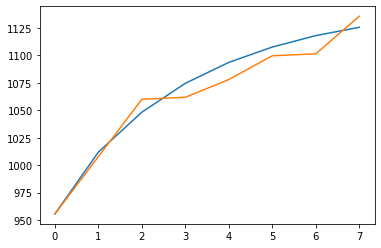

In [18]:
TimeId=range(0,8)
actual_results=[float(ConvertAirFrom_PPM_To_mgDivm3(df['CO2air'][i])) for i in range(943,943+8)]
plt.plot(TimeId,My_kq)
plt.plot(TimeId,actual_results)
plt.show()
#My_kq
#actual_results